In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
x_valid, x_train= x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]

In [7]:
# List of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Implementing Batch Normalization with Keras

As with most things with Keras, implementing Batch Normalization is simple and
intuitive. Just add a BatchNormalization layer before or after each hidden layer’s
activation function, and optionally add a BN layer as well as the first layer in your
model.

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal")
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])

SyntaxError: invalid syntax (<ipython-input-14-fb9b9e325271>, line 5)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

As you can see, each BN layer adds four parameters per input: γ, β, μ, and σ (for
example, the first BN layer adds 3,136 parameters, which is 4 × 784). The last two
parameters, μ and σ, are the moving averages; they are not affected by backpropagation,
so Keras calls them “non-trainable”9 (if you count the total number of BN
parameters, 3,136 + 1,200 + 400, and divide by 2, you get 2,368, which is the total
number of non-trainable parameters in this model).

In [17]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.5506 - accuracy: 0.8076 - val_loss: 0.4067 - val_accuracy: 0.8582
Epoch 2/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4253 - accuracy: 0.8497 - val_loss: 0.3731 - val_accuracy: 0.8688
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3849 - accuracy: 0.8613 - val_loss: 0.3582 - val_accuracy: 0.8696
Epoch 4/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3639 - accuracy: 0.8701 - val_loss: 0.3471 - val_accuracy: 0.8722
Epoch 5/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3459 - accuracy: 0.8759 - val_loss: 0.3402 - val_accuracy: 0.8784
Epoch 6/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3310 - accuracy: 0.8815 - val_loss: 0.3314 - val_accuracy: 0.8814
Epoch 7/10
55000/55000 [===========================

In [20]:
history2=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.2778 - accuracy: 0.8995 - val_loss: 0.3119 - val_accuracy: 0.8856
Epoch 2/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2711 - accuracy: 0.9018 - val_loss: 0.3043 - val_accuracy: 0.8886
Epoch 3/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2626 - accuracy: 0.9050 - val_loss: 0.3207 - val_accuracy: 0.8858
Epoch 4/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.2588 - accuracy: 0.9053 - val_loss: 0.3252 - val_accuracy: 0.8834
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2504 - accuracy: 0.9080 - val_loss: 0.3086 - val_accuracy: 0.8864
Epoch 6/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2447 - accuracy: 0.9094 - val_loss: 0.3192 - val_accuracy: 0.8896
Epoch 7/10
55000/55000 [===========================

In [21]:
history3=model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 103us/sample - loss: 0.2185 - accuracy: 0.9207 - val_loss: 0.3108 - val_accuracy: 0.8906
Epoch 2/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2147 - accuracy: 0.9214 - val_loss: 0.3102 - val_accuracy: 0.8922
Epoch 3/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2075 - accuracy: 0.9246 - val_loss: 0.3151 - val_accuracy: 0.8910
Epoch 4/20
55000/55000 [==============================] - 6s 103us/sample - loss: 0.2047 - accuracy: 0.9245 - val_loss: 0.3114 - val_accuracy: 0.8904
Epoch 5/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.2005 - accuracy: 0.9263 - val_loss: 0.3161 - val_accuracy: 0.8922
Epoch 6/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.1955 - accuracy: 0.9278 - val_loss: 0.3135 - val_accuracy: 0.8896
Epoch 7/20
55000/55000 [===========================

(0.0, 1.0)

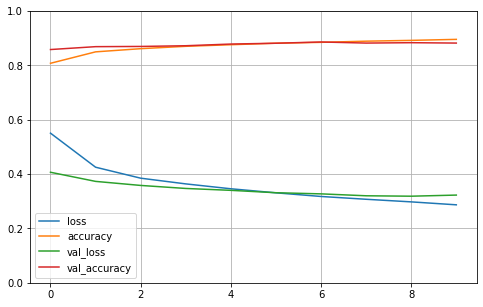

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 

(0.0, 1.0)

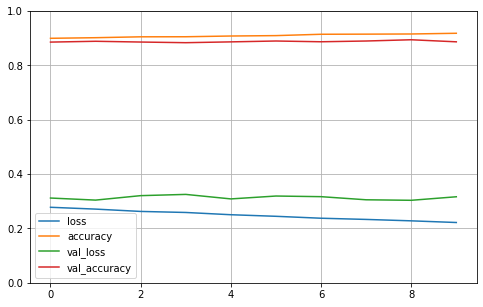

In [24]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 

(0.0, 1.0)

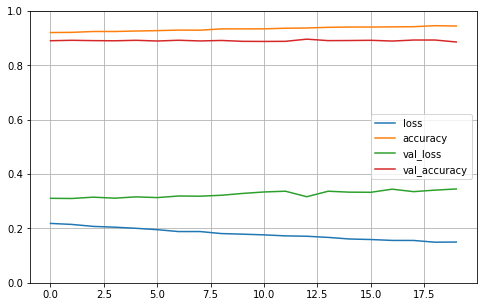

In [25]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [77]:
def build_model(n_hidden=1, n_neurons=3, learning_rate=3e-3, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    
    for layer in range(n_hidden):
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
        
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    
    model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
                 metrics=['accuracy'])
    
    return model




In [76]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

filepath="inference.weights.best.hdf5"

mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

callbacks_list = [mc,es]

keras_reg.fit(x_train,y_train, epochs=5,
             validation_data=(x_valid,y_valid),
              callbacks=callbacks_list
           )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
54912/55000 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.7737
Epoch 00001: val_accuracy improved from -inf to 0.83800, saving model to best_model.h5
55000/55000 [==============================] - 7s 128us/sample - loss: 0.6576 - accuracy: 0.7738 - val_loss: 0.4709 - val_accuracy: 0.8380
Epoch 2/5
54560/55000 [============================>.] - ETA: 0s - loss: 0.4916 - accuracy: 0.8277
Epoch 00002: val_accuracy improved from 0.83800 to 0.85600, saving model to best_model.h5
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4913 - accuracy: 0.8278 - val_loss: 0.4232 - val_accuracy: 0.8560
Epoch 3/5
54688/55000 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.8435
Epoch 00003: val_accuracy improved from 0.85600 to 0.85900, saving model to best_model.h5
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4488 - accuracy: 0.8436 - val_loss: 

In [74]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [81]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [82]:
filepath="inference.weights.best.hdf5"

mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

callbacks_list = [mc,es]

                validation_data=(x_valid, y_valid),
                callbacks=callbacks_list)

Train on 36666 samples, validate on 5000 samples
Epoch 1/10
36640/36666 [============================>.] - ETA: 0s - loss: 0.7807 - accuracy: 0.7346
Epoch 00001: val_accuracy improved from -inf to 0.82020, saving model to best_model.h5
36666/36666 [==============================] - 6s 155us/sample - loss: 0.7805 - accuracy: 0.7347 - val_loss: 0.5220 - val_accuracy: 0.8202
Epoch 2/10
36320/36666 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.8105
Epoch 00002: val_accuracy improved from 0.82020 to 0.84060, saving model to best_model.h5
36666/36666 [==============================] - 5s 132us/sample - loss: 0.5448 - accuracy: 0.8104 - val_loss: 0.4622 - val_accuracy: 0.8406
Epoch 3/10
36448/36666 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.8275
Epoch 00003: val_accuracy improved from 0.84060 to 0.85000, saving model to best_model.h5
36666/36666 [==============================] - 5s 136us/sample - loss: 0.4947 - accuracy: 0.8274 - val_los

KeyboardInterrupt: 